In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
API_KEY = 'a6fc05a483c284588af9b162c7bd34f2'
CITY = 'Nagpur'

In [3]:
def fetch_aqi_data(api_key, city, start, end):
    # Get city geo-coordinates
    geo_url = f'http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={api_key}'
    geo_response = requests.get(geo_url)
    geo_data = geo_response.json()

    # Handle case where the city is not found or no data is returned
    if not geo_data:
        raise ValueError(f"City '{city}' not found in the API.")

    # Extract latitude and longitude
    lat = geo_data[0].get('lat')
    lon = geo_data[0].get('lon')

    if lat is None or lon is None:
        raise ValueError(f"Could not retrieve coordinates for city '{city}'.")

    # Fetch AQI data
    url = f'http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start}&end={end}&appid={api_key}'
    response = requests.get(url)
    data = response.json()

    # Handle case where no AQI data is returned
    if 'list' not in data:
        raise ValueError(f"No AQI data found for city '{city}' during the specified period.")

    return data['list']

# Example usage
API_KEY = "a6fc05a483c284588af9b162c7bd34f2"
CITY = "Pune"
end_time = 1695052800  # Example end time (UNIX timestamp)
start_time = end_time - (7 * 24 * 60 * 60)  # 7 days ago

try:
    aqi_data = fetch_aqi_data(API_KEY, CITY, start_time, end_time)
    print(aqi_data)
except ValueError as e:
    print(f"Error: {e}")


[{'main': {'aqi': 1}, 'components': {'co': 277.04, 'no': 0.01, 'no2': 6.68, 'o3': 29.68, 'so2': 5.01, 'pm2_5': 6.46, 'pm10': 9.88, 'nh3': 1.46}, 'dt': 1694448000}, {'main': {'aqi': 1}, 'components': {'co': 277.04, 'no': 0.02, 'no2': 6.68, 'o3': 26.11, 'so2': 4.71, 'pm2_5': 6.69, 'pm10': 10.36, 'nh3': 1.52}, 'dt': 1694451600}, {'main': {'aqi': 1}, 'components': {'co': 257.02, 'no': 0.02, 'no2': 5.74, 'o3': 24.32, 'so2': 3.93, 'pm2_5': 6.17, 'pm10': 9.56, 'nh3': 1.36}, 'dt': 1694455200}, {'main': {'aqi': 1}, 'components': {'co': 236.99, 'no': 0.02, 'no2': 4.28, 'o3': 24.32, 'so2': 3.31, 'pm2_5': 5.89, 'pm10': 8.86, 'nh3': 1.14}, 'dt': 1694458800}, {'main': {'aqi': 1}, 'components': {'co': 226.97, 'no': 0.01, 'no2': 3.68, 'o3': 24.32, 'so2': 3.34, 'pm2_5': 7.37, 'pm10': 11.03, 'nh3': 1.04}, 'dt': 1694462400}, {'main': {'aqi': 1}, 'components': {'co': 223.64, 'no': 0.01, 'no2': 3.6, 'o3': 23.6, 'so2': 3.4, 'pm2_5': 8.51, 'pm10': 12.9, 'nh3': 1.03}, 'dt': 1694466000}, {'main': {'aqi': 1}, '

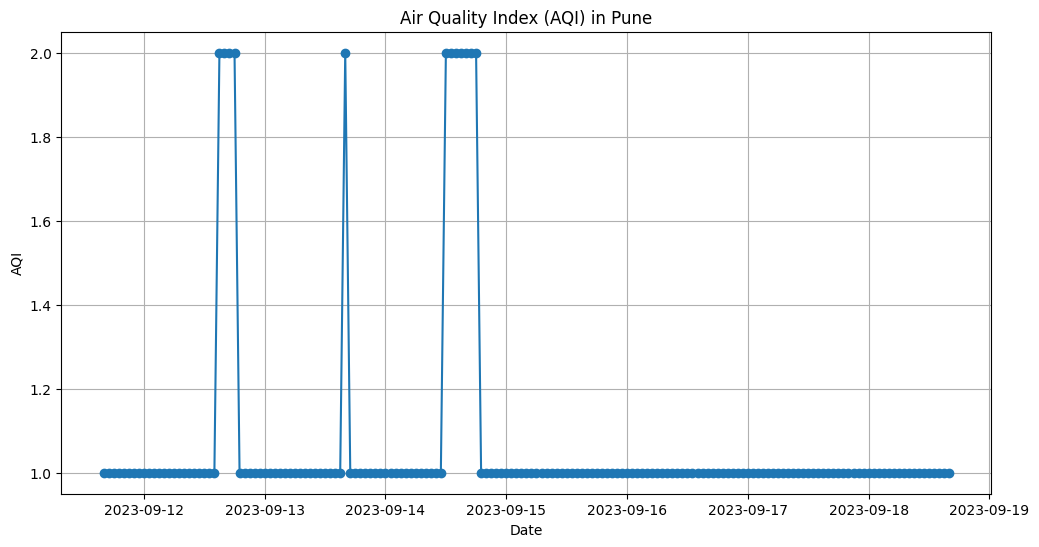

In [ ]:
def process_aqi_data(data):
    records = []

    # Check if data is a list or a dictionary
    if isinstance(data, list):
        items = data  # If list, process it directly
    elif isinstance(data, dict) and 'list' in data:
        items = data['list']  # If dictionary with 'list' key, extract the list
    else:
        raise ValueError("Data format is incorrect. Expected a dictionary with 'list' key or a list.")

    for item in items:
        dt = datetime.datetime.fromtimestamp(item['dt'])
        aqi = item['main']['aqi']
        components = item['components']
        record = {
            'datetime': dt,
            'aqi': aqi,
            **components
        }
        records.append(record)

    return pd.DataFrame(records)

# Process AQI data
aqi_df = process_aqi_data(aqi_data)

# Plot AQI over time
plt.figure(figsize=(12, 6))
plt.plot(aqi_df['datetime'], aqi_df['aqi'], marker='o', linestyle='-')
plt.title(f'Air Quality Index (AQI) in {CITY}')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()


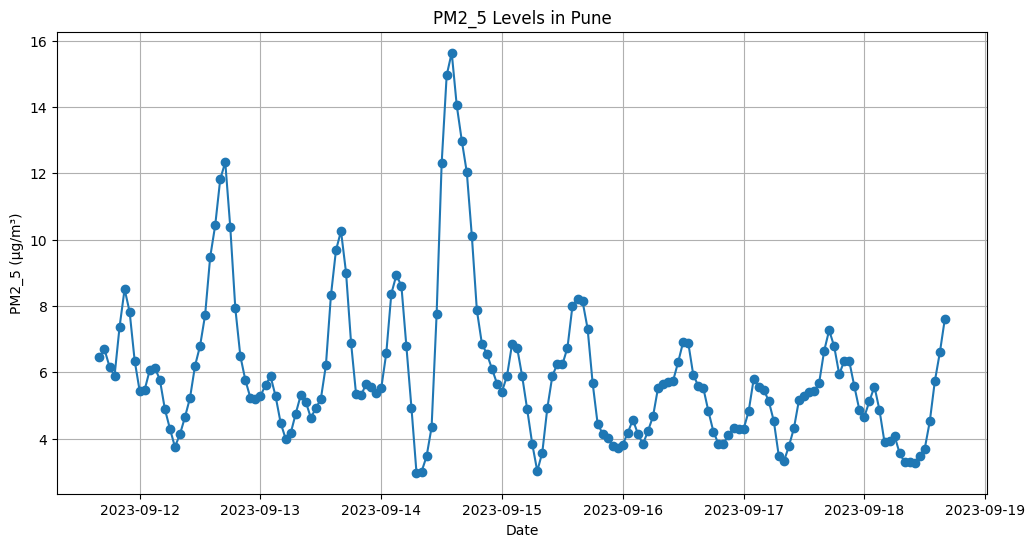

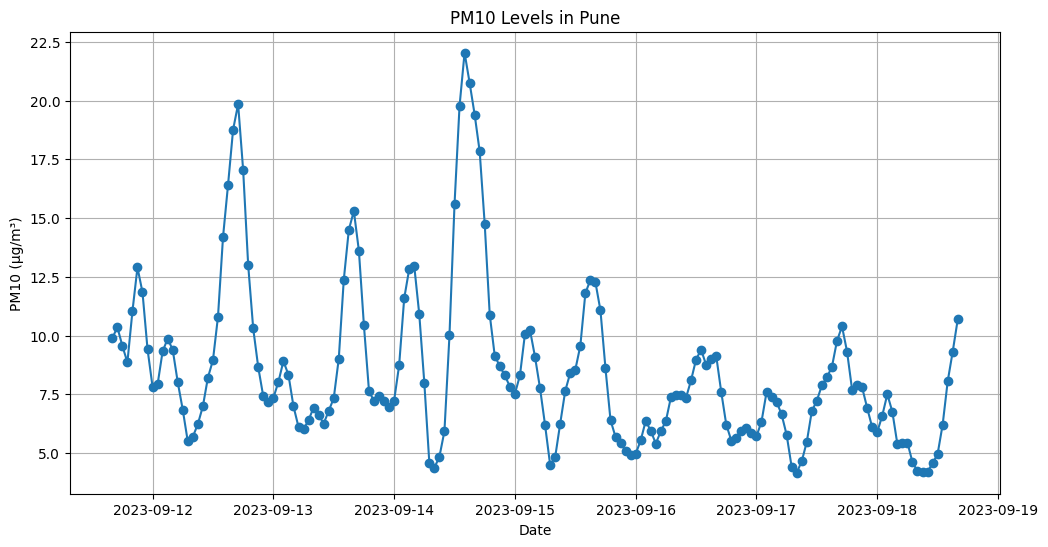

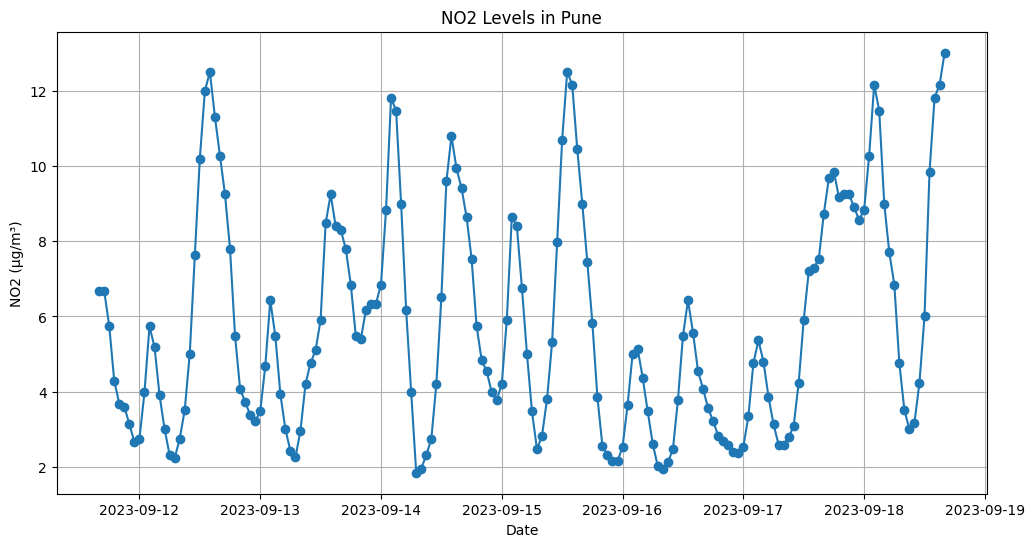

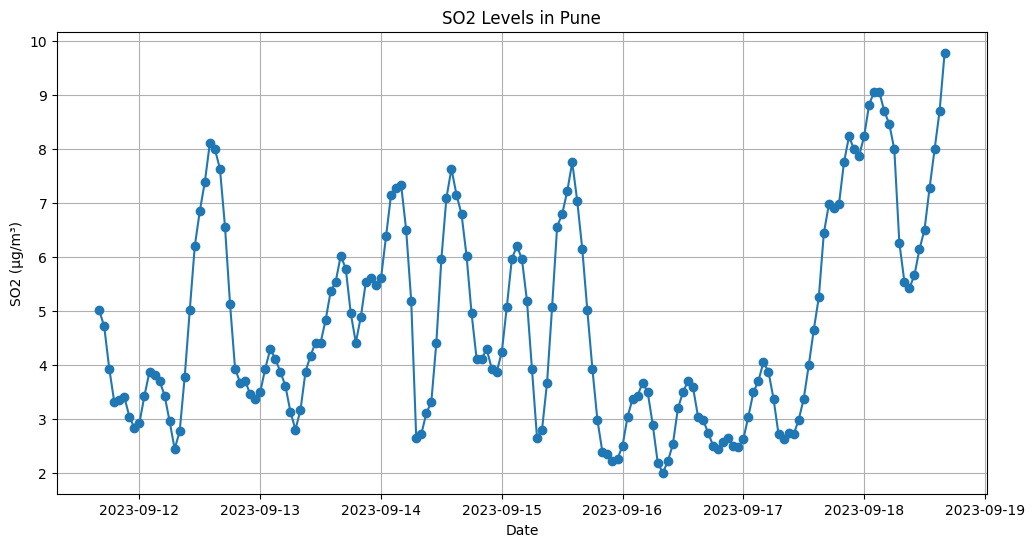

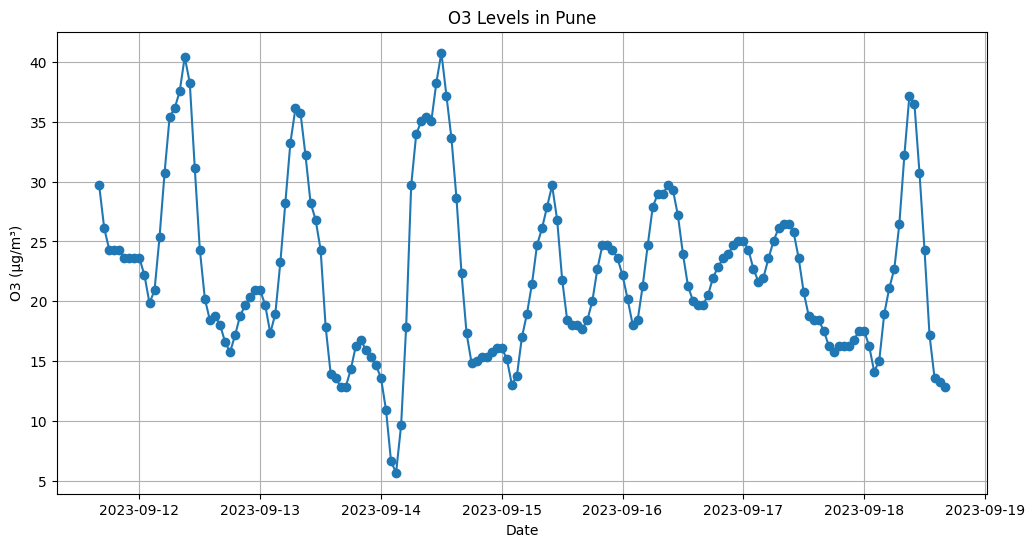

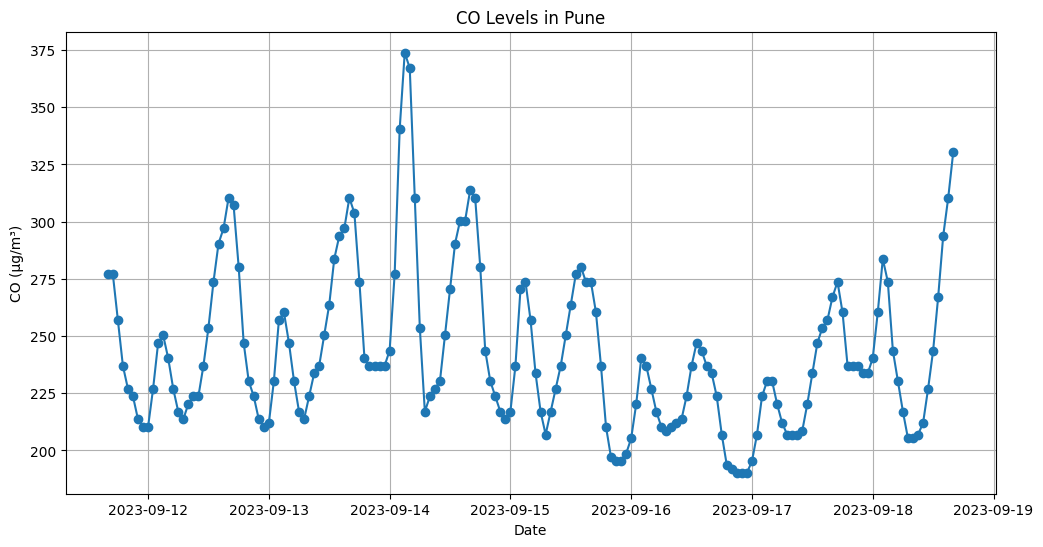

In [ ]:
# Plot individual components
components = ['pm2_5', 'pm10', 'no2', 'so2', 'o3', 'co']
for component in components:
    plt.figure(figsize=(12, 6))
    plt.plot(aqi_df['datetime'], aqi_df[component], marker='o', linestyle='-')
    plt.title(f'{component.upper()} Levels in {CITY}')
    plt.xlabel('Date')
    plt.ylabel(f'{component.upper()} (µg/m³)')
    plt.grid(True)
    plt.show()


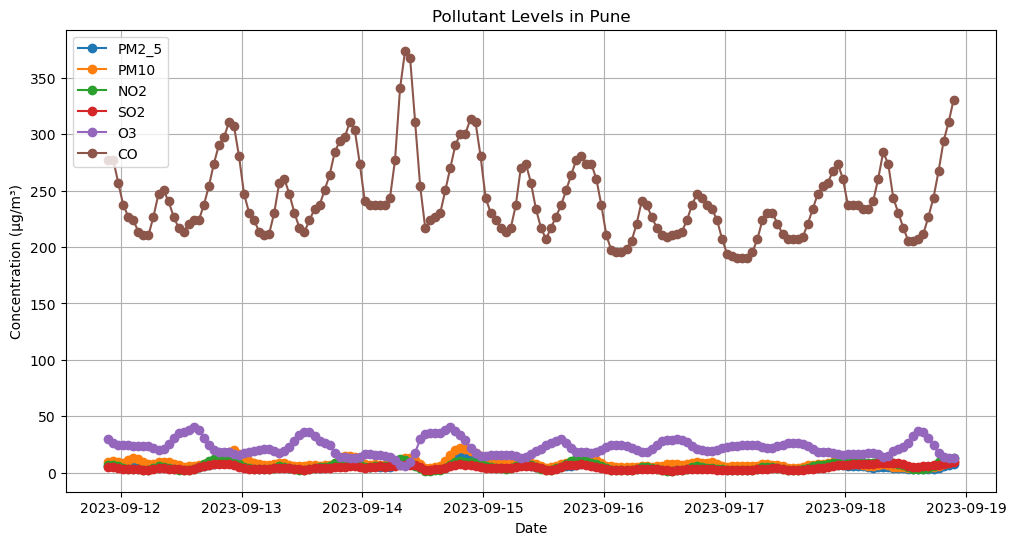

In [ ]:
# Plotting multiple components in a single plot for comparison
plt.figure(figsize=(12, 6))
for component in components:
    plt.plot(aqi_df['datetime'], aqi_df[component], marker='o', linestyle='-', label=component.upper())
plt.title(f'Pollutant Levels in {CITY}')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()

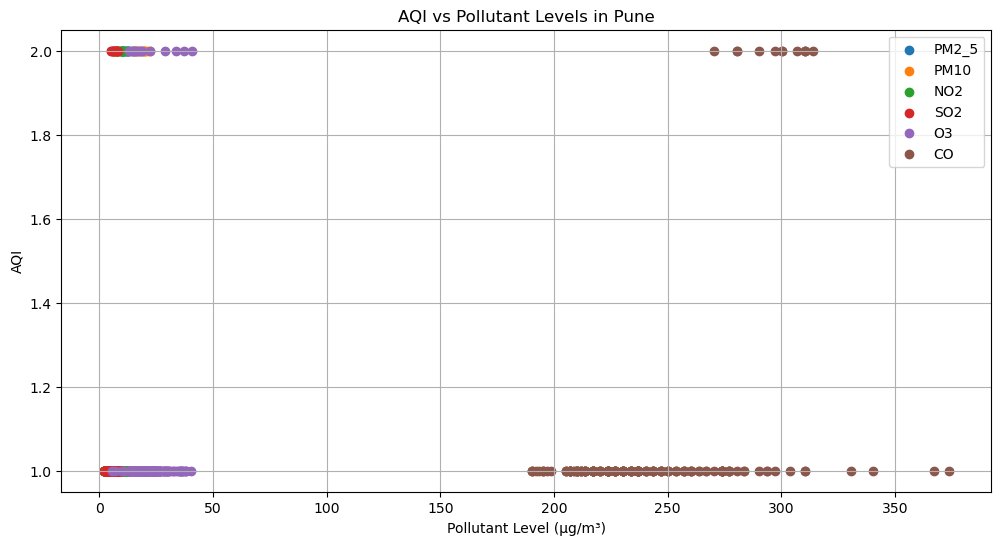

In [ ]:
# Scatter plot for AQI vs individual components
plt.figure(figsize=(12, 6))
for component in components:
    plt.scatter(aqi_df[component], aqi_df['aqi'], label=component.upper())
plt.title(f'AQI vs Pollutant Levels in {CITY}')
plt.xlabel('Pollutant Level (µg/m³)')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()